In [68]:
#supress warning 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import sklearn
from sklearn.metrics import r2_score
from statistics import mode
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#change the default number of rows to be displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_info_columns', 1000)

In [69]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#paste train and test together in order to clean full data
test['Survived'] = np.nan
full = train.append(test).reset_index(drop=True)

In [6]:
full.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
#check missing values(%)
'''We have a lot (77%) missing data in Cabin, look into data and decide to drop it or fill it.
   Survived missing data comes from test data, so we don't have to worry about it.
   Age has 20% missing values, check correlation matrix to decide how to fill them!
   Embarked are categorical variable, fill it with mode might be a good way.
   For fare, take same step as Age.
'''
full.isna().mean().sort_values(ascending=False)


Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
SibSp          0.000000
Sex            0.000000
Pclass         0.000000
PassengerId    0.000000
Parch          0.000000
Name           0.000000
dtype: float64

In [9]:
#check cabin
'''it seems hard to grab info from cabin, so we are gona to drop it'''
full.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
#drop Cabin

full.drop(columns='Cabin', inplace=True)

(8, 0)

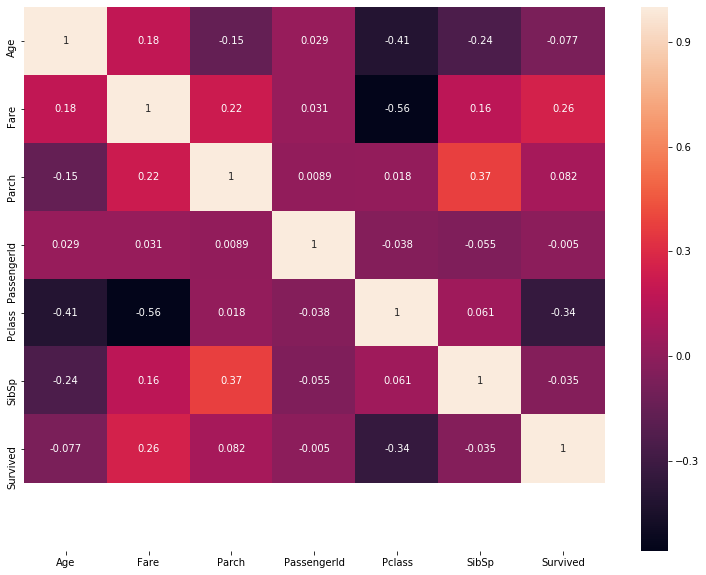

In [11]:
#use correlation metrix to explore best way to fill missing values in Age / fare
''''''
plt.figure(figsize=(13,10))
ax = sns.heatmap(full.corr(), annot=True)
ax.get_ylim()
ax.set_ylim(8,0)

In [12]:
#explore age
'''Age has a relationship with Pclass'''
full.groupby('Pclass')['Age'].median()



Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [13]:
loc = full['Age'].isna()
full[loc]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
29,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
31,NaN,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
32,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677
36,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677
42,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253


In [14]:
#use pclass median age to fill missing values in age column
full['Age'] = full.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


In [15]:
full[loc]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,24.0,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,29.0,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,24.0,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,24.0,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,24.0,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
29,24.0,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
31,39.0,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
32,24.0,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677
36,24.0,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677
42,24.0,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253


In [16]:
#fare also have high correlation with pclass
full.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [17]:
lox = full['Fare'].isna()
full[lox]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [18]:
#use median fare per pclass to fill missing values
full['Fare'] = full.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))


In [19]:
full[lox]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,S,8.05,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [20]:
#look into Embarked, S is the most type, fill missing with S

full['Embarked'].value_counts()


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
full['Embarked'] = full['Embarked'].fillna('S')

In [22]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [23]:
'''Now, we fill all missing values. Next, we will look into each column to grab useful info from it'''
full.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [24]:
'''For name column, we can obtain title info'''
full['Title'] = full['Name'].str.split('.',expand=True)[0].str.rsplit(expand=True,n=1)[1]

In [25]:
#look into our new title column, lots of rare name. Clean it up!

full['Title'].value_counts(normalize=True)

Mr          0.578304
Miss        0.198625
Mrs         0.150497
Master      0.046600
Dr          0.006112
Rev         0.006112
Col         0.003056
Mlle        0.001528
Major       0.001528
Ms          0.001528
Dona        0.000764
Mme         0.000764
Jonkheer    0.000764
Countess    0.000764
Lady        0.000764
Sir         0.000764
Capt        0.000764
Don         0.000764
Name: Title, dtype: float64

In [26]:
#replace rare value into 'Other'

keep = ['Mr','Miss','Mrs','Master']

full.loc[~full['Title'].isin(keep),'Title']= 'Other'

        

In [27]:
full['Title'].value_counts(normalize=True)

Mr        0.578304
Miss      0.198625
Mrs       0.150497
Master    0.046600
Other     0.025974
Name: Title, dtype: float64

In [28]:
'''Put SibSp and Parch together and create a familysize column'''

full['FamilySize'] = full['SibSp'] + full['Parch'] + 1


In [29]:
full.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1


In [30]:
#drop redundant columns

full.drop(columns=['Name','SibSp','Parch','Ticket'],inplace=True)
    

In [31]:
full.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,FamilySize
0,22.0,S,7.2500,1,3,male,0.0,Mr,2
1,38.0,C,71.2833,2,1,female,1.0,Mrs,2
2,26.0,S,7.9250,3,3,female,1.0,Miss,1
3,35.0,S,53.1000,4,1,female,1.0,Mrs,2
4,35.0,S,8.0500,5,3,male,0.0,Mr,1


In [32]:
#check column type
full.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,FamilySize
0,22.0,S,7.2500,1,3,male,0.0,Mr,2
1,38.0,C,71.2833,2,1,female,1.0,Mrs,2
2,26.0,S,7.9250,3,3,female,1.0,Miss,1
3,35.0,S,53.1000,4,1,female,1.0,Mrs,2
4,35.0,S,8.0500,5,3,male,0.0,Mr,1


In [33]:
#make a train data copy for eda
train_eda = full[full['Survived'].notna()].copy()

In [34]:
#change categorical columns into numbers for modeling part
col = ['Embarked', 'Sex', 'Title']

for value in col:
    print(value,full[value].unique())


Embarked ['S' 'C' 'Q']
Sex ['male' 'female']
Title ['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [35]:
full.loc[full['Embarked']=='S', ['Embarked']] = 0
full.loc[full['Embarked']=='C', ['Embarked']] = 1
full.loc[full['Embarked']=='Q', ['Embarked']] = 2

full.loc[full['Sex']=='male', ['Sex']] = 0
full.loc[full['Sex']=='female', ['Sex']] = 1


full.loc[full['Title']=='Mr', ['Title']] = 0
full.loc[full['Title']=='Mrs', ['Title']] = 1
full.loc[full['Title']=='Miss', ['Title']] = 2
full.loc[full['Title']=='Master', ['Title']] = 3
full.loc[full['Title']=='Other', ['Title']] = 4

In [36]:
#split data back into train and test
train_clean = full[full['Survived'].notna()]
test_clean = full[full['Survived'].isna()]

In [37]:
#change train survived column type
train_clean['Survived'] = train_clean['Survived'].astype('int')

# EDA

In [38]:
#survival rate on categorical variables
'''1. female > male,
   2. class1 > class2 > class3,
   3. seaport C > seaport Q > seaport S
'''

by = ['Sex','Pclass', 'Embarked', 'Title', 'FamilySize']


for col in by:
    print(train_eda.groupby([col])['Survived'].mean().sort_values(ascending=False))
    print('-'*10)
    print('\n')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
----------


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
----------


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
----------


Title
Mrs       0.792000
Miss      0.697802
Master    0.575000
Other     0.444444
Mr        0.156673
Name: Survived, dtype: float64
----------


FamilySize
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
11    0.000000
8     0.000000
Name: Survived, dtype: float64
----------




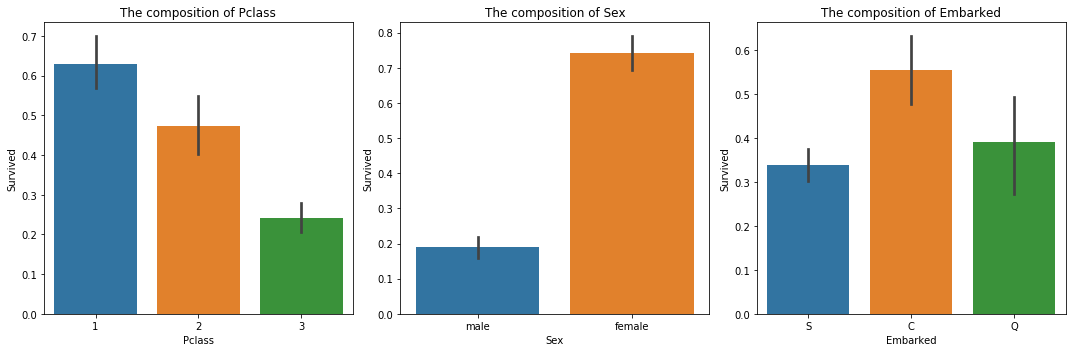

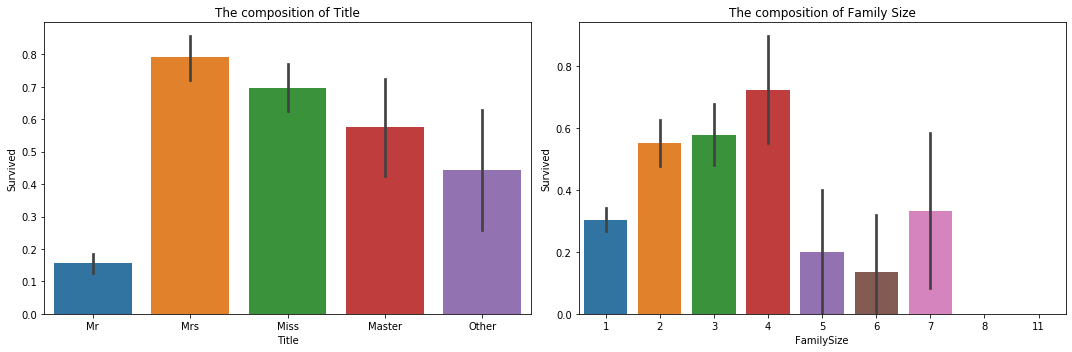

In [39]:
#vidualize surviveal rate 
'''pclass and sex are good indicators'''


f, axes = plt.subplots(1, 3,figsize=(15,5))

sns.catplot(x='Pclass', y='Survived',data=train_eda, kind='bar', ax=axes[0])
axes[0].set_title('The composition of Pclass')


sns.catplot(x='Sex', y='Survived',data=train_eda, kind='bar',ax=axes[1])
axes[1].set_title('The composition of Sex')

sns.catplot(x='Embarked', y='Survived',data=train_eda, kind='bar',ax=axes[2])
axes[2].set_title('The composition of Embarked')

plt.close(2)
plt.close(3)
plt.close(4)
plt.tight_layout()
plt.show()

f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.catplot(x='Title', y='Survived',data=train_eda, kind='bar',ax=axes[0])
axes[0].set_title('The composition of Title')

sns.catplot(x='FamilySize', y='Survived',data=train_eda, kind='bar',ax=axes[1])
axes[1].set_title('The composition of Family Size')


plt.close(2)
plt.close(3)



plt.tight_layout()
plt.show()


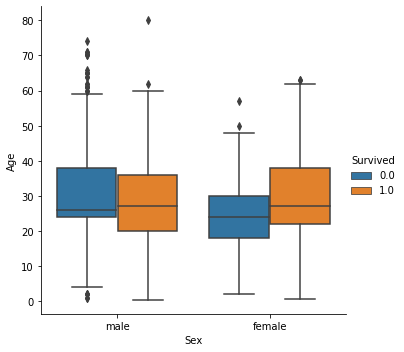

In [40]:
'''The median age of people who survived is higher'''
sns.catplot(x='Sex', y='Age',data=train_eda, kind='box',hue='Survived')
plt.show()

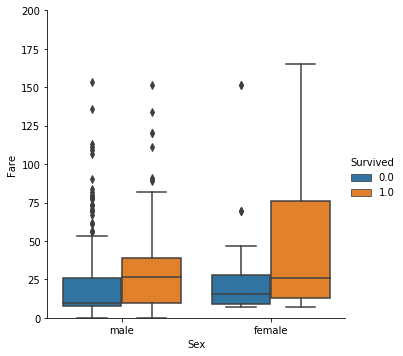

In [41]:
'''People who survived tend to paid more!'''
sns.catplot(x='Sex', y='Fare',data=train_eda, kind='box',hue='Survived')
plt.ylim(0,200)
plt.show()

# Modeling

In [42]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(train_clean.drop(['Survived','PassengerId'], axis = 1), 
                                                    train_clean['Survived'], test_size = 0.2, 
                                                    random_state = 2)
print(X_train.shape)
print(X_test.shape)

(712, 7)
(179, 7)


In [43]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

In [44]:
round(np.mean(y_pred), 2)

0.35

In [45]:
round(np.mean(train_clean['Survived']), 2)

0.38

In [46]:
#accuracy rate
logreg.score(X_test, Y_test)

0.7932960893854749

In [47]:
print(confusion_matrix(Y_test, y_pred))

[[90 10]
 [27 52]]


In [48]:
#precision: in all survived cases, how many cases does the model predict accurately?
#recall: in all predicted survived cases, how many cases are actually survived?
#https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.84      0.66      0.74        79

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179



In [49]:
#Cross-Validation in logistic regression: k-fold

# Set our robust cross-validation scheme!
kf = KFold(n_splits = 5, random_state = 2)


In [50]:
# Print our CV accuracy estimate: (increase a little bit)

cross_val_score(logreg, train_clean.drop(['Survived','PassengerId'], axis = 1),train_clean['Survived'], cv = kf).mean()

0.7991023790094784

In [51]:
#random forest!!

from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier(random_state = 2)


In [52]:
'''Below we set the hyperparameter grid of values with 4 lists of values:

'criterion' : A function which measures the quality of a split.
'n_estimators': The number of trees of our random forest.
'max_features': The number of features to choose when looking for the best way of splitting.
'max_depth' : the maximum depth of a decision tree.
'''

# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [53]:
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [54]:
# Print best hyperparameters
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300}

In [55]:
# Define our optimal randomForest algo
randomForestFinalModel = RandomForestClassifier(random_state = 2, 
                                                criterion = 'gini', max_depth = 7, 
                                                max_features = 'auto', n_estimators = 300)

In [56]:
# Fit the model to the training set
randomForestFinalModel.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [57]:
#Predict!
predictions = randomForestFinalModel.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for our powerful random forest!

print("accuracy is: ", round(accuracy_score(Y_test, predictions), 3))

accuracy is:  0.804


In [63]:
# Predict!
test_clean['Survived'] = randomForestFinalModel.predict(test_clean.drop(['PassengerId','Survived'], axis = 1))

In [64]:
test_clean[['PassengerId', 'Survived']]

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [66]:
# Write test predictions for final submission
test_clean[['PassengerId', 'Survived']].to_csv('rf_submission.csv', index = False)

In [67]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 9 columns):
Age            418 non-null float64
Embarked       418 non-null int64
Fare           418 non-null float64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Survived       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 32.7 KB
